<a href="https://colab.research.google.com/github/braimahm/Derivative-Spectra-for-Land-Cover---Python-Codes/blob/main/Field_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
 ''' The code interpolates the 1nm reflectance to 10nm
 and computes derivatives'''

##we are importing operational packages

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

##we are importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [124]:


""" We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file
"""

ZachA_LynnW = pd.ExcelFile('/content/042623_HWHF_10d_1_1.xlsx')
ZachA_15_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_15_Weeds')
ZachA_15_Soil = pd.read_excel(ZachA_LynnW, 'ZachA15_Soil')
ZachA_14_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_14_Weeds')
ZachA_14_Soil = pd.read_excel(ZachA_LynnW, 'ZachA14_Soil')
ZachA_13_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA13_Weeds')
ZachA_13_Soil = pd.read_excel(ZachA_LynnW, 'ZachA13_10D_Soil')
ZachA_12_Wheat = pd.read_excel(ZachA_LynnW, 'ZachA12_Wheat')
ZachA_12_Road = pd.read_excel(ZachA_LynnW, 'ZachA12_Road')
ZachA_11_Wheat = pd.read_excel(ZachA_LynnW, 'ZackA_11_Wheat')
ZachA_11_Soil = pd.read_excel(ZachA_LynnW, 'ZachA11_Soil')
LynnW05_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Cornres')
LynnW05_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Bare_Soil')
LynnW04_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW04_Cornres')
LynnW04_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW04_Bare_SOil')
LynnW03_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW03_Cornres')
LynnW03_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW_03_Bare_Soil')
LynnW02_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Cornres')
LynnW02_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Bare_Soil')
LynnW01_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Cornres')
LynnW01_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Bare_Soil')

SK_farms = pd.ExcelFile('/content/052423_HWHF_10d_1.xlsx')
SK_5_Soil = pd.read_excel(SK_farms, '052423_SK_5_Soil')
SK_5_Grass = pd.read_excel(SK_farms, '052423_SK_5_Grass')
SK_4_Soil = pd.read_excel(SK_farms, '052423_SK_4_Soil')
SK_4_Grass = pd.read_excel(SK_farms, '052423_SK_4_Grass')
SK_3_Soil = pd.read_excel(SK_farms, '052423_SK_3_Soil')
SK_3_Grass = pd.read_excel(SK_farms, '052423_SK_3_Grass')
SK_2_Soil = pd.read_excel(SK_farms, '052423_SK_2_Soil')
SK_2_Grass = pd.read_excel(SK_farms, '052423_SK_2_Grass')
SK_1_Soil = pd.read_excel(SK_farms, '052423_SK_1_Soil')
SK_1_Grass = pd.read_excel(SK_farms, '052423_SK_1_Grass')

KB_farms = pd.ExcelFile('/content/052223_HWHF_10d_1.xlsx')
KB_5_Wheat = pd.read_excel(KB_farms, '52223_KB5_Wheat')
KB_5_Soil = pd.read_excel(KB_farms, '052223_KB5_Soil')
KB_5_Drying_Wheat = pd.read_excel(KB_farms, '052223_KB5_Drying_Wheat')
KB_5_Corn_Res = pd.read_excel(KB_farms, '052223_KB5_Corn_Res')
KB_4_Soil = pd.read_excel(KB_farms, '052223_KB4_Soil')
KB_4_Dry_Rye = pd.read_excel(KB_farms, '052223_KB4_Dry_Rye')
KB_4_Corn_Res = pd.read_excel(KB_farms, '052223_KB4_Corn_Res')
KB_3_Soil = pd.read_excel(KB_farms, '052223_KB3_Soil')
KB_3_Corn_Res = pd.read_excel(KB_farms, '052223_KB_3_Corn_Res')
KB_1_Soil = pd.read_excel(KB_farms, '052223_KB1_Soil')
KB_1_Corn_Res = pd.read_excel(KB_farms, '052223_KB1_Corn_Res')
JB_5_Soil = pd.read_excel(KB_farms, '052223_JB5_Soil')
JB_5_Corn_Res = pd.read_excel(KB_farms, '052223_JB5_Corn_Res')
JB_4_Soil = pd.read_excel(KB_farms, '052223_JB4_Soil')
JB_4_Corn_Res = pd.read_excel(KB_farms, '052223_JB4_CorenRes')
JB_3_Soil = pd.read_excel(KB_farms, '052223_JB3_Soil')
JB_3_Corn_Res = pd.read_excel(KB_farms, '052223_JB3_Corn_Residue')
JB_2_Soil = pd.read_excel(KB_farms, '052223_JB2_Soil')
JB_2_Corn_Res = pd.read_excel(KB_farms, '052223_JB2_Corn_Residue')
JB_1_Soil = pd.read_excel(KB_farms, '052223_JB1_Soil')
JB_1_Corn_Res = pd.read_excel(KB_farms, '052223_JB1_CornRes')
JB_1_Soya_Bean = pd.read_excel(KB_farms, '052223_JB1_Soya_Bean')
JB_Grass_Filt = pd.read_excel(KB_farms, '052223_JB_Grass_Filt')
JB_0_Road = pd.read_excel(KB_farms, '052223_JB0_Road')

JanD_farms = pd.ExcelFile('/content/041923_HWHF_10d_1_1.xlsx')
JanD_S10_Weeds = pd.read_excel(JanD_farms, '041923_JanDS10_Weeds')
JanD_S9_Weeds = pd.read_excel(JanD_farms, '041923_JanDS09_Weeds')
JanD_S9_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS09_Cornres')
JanD_S8_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS08_Cornres')
JanD_S8_Bare_Soil = pd.read_excel(JanD_farms, '041923JanDS08_Baresoil')
JanD_S6_Weed = pd.read_excel(JanD_farms, '041923_JanDS06_Weed')
JanD_S6_Weed_2 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed2')
JanD_S6_Weed_3 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed3')
JanD_S6_Bare_Soil = pd.read_excel(JanD_farms, '041923_JanDS06_Baresoil')
JanD_S6_Corn_Redw = pd.read_excel(JanD_farms, '041923JanDS06_Corn_Redw')


In [125]:
"This function calculates the mean avaerage reflectance of the sample and multiplies it by 100"

def mean_reflectance (sample):
  sample["Mean Reflectance"] = sample.drop('Wavelength', axis=1).mean(axis=1)*100
  return sample["Mean Reflectance"]

Text(0, 0.5, 'Reflectance')

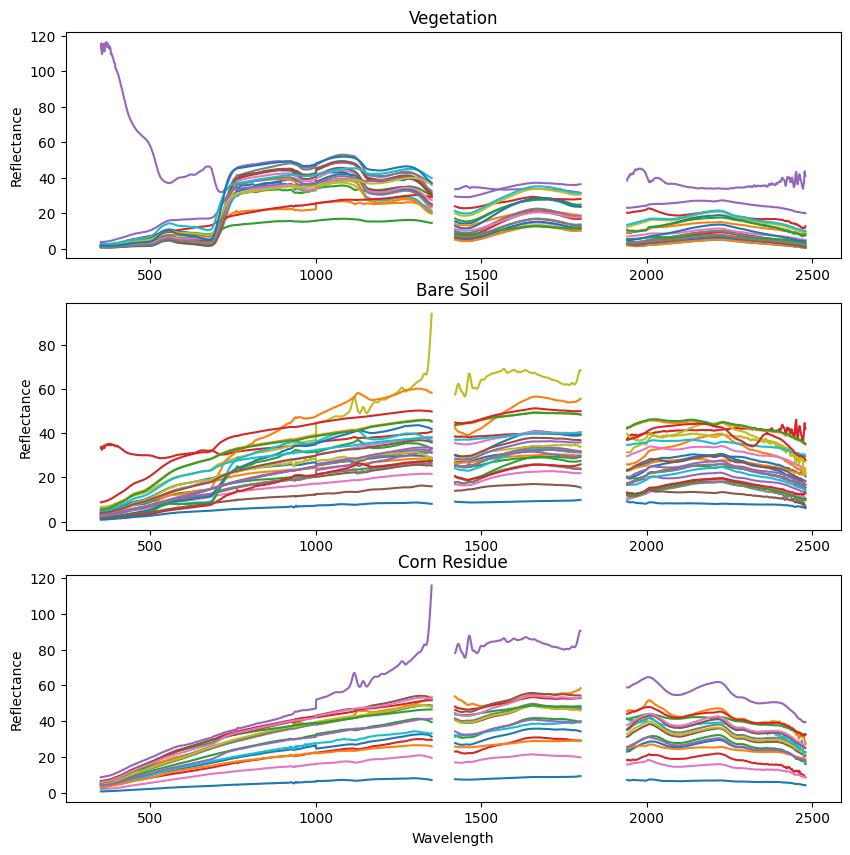

In [126]:
'''We want to  plot the average reflectance
for 1nm wavelength. This was plotted after the atmospheric corrections
had been done in excel
The plot takes on the mean_reflectance function of each sample and plot it against the 1nm wavelength
'''
wavelength = ZachA_15_Weeds['Wavelength']
fig,axs = plt.subplots(3,1, figsize =(10,10))
axs[0].plot(wavelength, mean_reflectance (ZachA_15_Weeds))
axs[0].plot(wavelength, mean_reflectance(ZachA_14_Weeds))
axs[0].plot(wavelength, mean_reflectance(ZachA_13_Weeds))
axs[0].plot(wavelength, mean_reflectance(ZachA_12_Wheat))
axs[0].plot(wavelength,mean_reflectance( ZachA_11_Wheat))
axs[0].plot(wavelength, mean_reflectance(ZachA_12_Road))
axs[0].plot(wavelength, mean_reflectance(SK_5_Grass))
axs[0].plot(wavelength, mean_reflectance(SK_4_Grass))
axs[0].plot(wavelength, mean_reflectance(SK_3_Grass))
axs[0].plot(wavelength, mean_reflectance(SK_2_Grass))
axs[0].plot(wavelength, mean_reflectance(SK_1_Grass))
axs[0].plot(wavelength, mean_reflectance(KB_5_Wheat))
axs[0].plot(wavelength, mean_reflectance(KB_5_Drying_Wheat))
axs[0].plot(wavelength, mean_reflectance(KB_4_Dry_Rye))
axs[0].plot(wavelength, mean_reflectance(JB_1_Soya_Bean))
axs[0].plot(wavelength, mean_reflectance(JB_Grass_Filt))
axs[0].plot(wavelength, mean_reflectance(JanD_S10_Weeds))
axs[0].plot(wavelength, mean_reflectance(JanD_S9_Weeds))
axs[0].plot(wavelength, mean_reflectance(JanD_S6_Weed))
axs[0].plot(wavelength, mean_reflectance(JanD_S6_Weed_2))
axs[0].plot(wavelength, mean_reflectance(JanD_S6_Weed_3))

axs[0].set_title("Vegetation")
#axs[0].set_xlabel('Wavelength')
axs[0].set_ylabel('Reflectance')

axs[1].plot(wavelength, mean_reflectance(ZachA_15_Soil))
axs[1].plot(wavelength, mean_reflectance(ZachA_14_Soil))
axs[1].plot(wavelength, mean_reflectance(ZachA_13_Soil))
axs[1].plot(wavelength, mean_reflectance(ZachA_11_Soil))
axs[1].plot(wavelength,mean_reflectance(LynnW05_Soil))
axs[1].plot(wavelength, mean_reflectance(LynnW04_Soil))
axs[1].plot(wavelength, mean_reflectance(LynnW03_Soil))
axs[1].plot(wavelength, mean_reflectance(LynnW02_Soil))
axs[1].plot(wavelength, mean_reflectance(LynnW01_Soil))
axs[1].plot(wavelength, mean_reflectance(SK_5_Soil))
axs[1].plot(wavelength, mean_reflectance(SK_4_Soil))
axs[1].plot(wavelength, mean_reflectance(SK_3_Soil))
axs[1].plot(wavelength, mean_reflectance(SK_2_Soil))
axs[1].plot(wavelength, mean_reflectance(SK_1_Soil))
axs[1].plot(wavelength, mean_reflectance(KB_5_Soil))
axs[1].plot(wavelength, mean_reflectance(KB_4_Soil))
axs[1].plot(wavelength, mean_reflectance(KB_3_Soil))
axs[1].plot(wavelength, mean_reflectance(KB_1_Soil))
axs[1].plot(wavelength, mean_reflectance(JB_5_Soil))
axs[1].plot(wavelength, mean_reflectance(JB_4_Soil))
axs[1].plot(wavelength, mean_reflectance(JB_3_Soil))
axs[1].plot(wavelength, mean_reflectance(JB_2_Soil))
axs[1].plot(wavelength, mean_reflectance(JB_1_Soil))
axs[1].plot(wavelength, mean_reflectance(JB_0_Road))
axs[1].plot(wavelength, mean_reflectance(JanD_S8_Bare_Soil ))
axs[1].plot(wavelength, mean_reflectance(JanD_S6_Bare_Soil ))

axs[1].set_title("Bare Soil")
#axs[1].set_xlabel('Wavelength')
axs[1].set_ylabel('Reflectance')


axs[2].plot(wavelength, mean_reflectance(LynnW05_CornRes))
axs[2].plot(wavelength, mean_reflectance( LynnW04_CornRes))
axs[2].plot(wavelength, mean_reflectance(LynnW03_CornRes))
axs[2].plot(wavelength, mean_reflectance(LynnW02_CornRes))
axs[2].plot(wavelength, mean_reflectance(LynnW01_CornRes))
axs[2].plot(wavelength, mean_reflectance(KB_5_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(KB_4_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(KB_3_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(KB_1_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JB_5_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JB_4_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JB_3_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JB_2_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JB_1_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JanD_S9_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JanD_S8_Corn_Res))
axs[2].plot(wavelength, mean_reflectance(JanD_S6_Corn_Redw))



axs[2].set_title("Corn Residue")
axs[2].set_xlabel('Wavelength')
axs[2].set_ylabel('Reflectance')

In [127]:
'''This function performs the interpolation at 10nm and calculates the derivative spectra'''
def derivative(sample):

  ## we convert the mean reflectance and wavelength at 1nm  to numpy arrays
  Wavelength_np = np.array(sample["Wavelength"])

  #we apply the mean_reflectance function on the sample and convert it to numpy arrays
  Reflectance_np= np.array( mean_reflectance (sample))

  ##we tell python to give us values from 350 t0 2500, in intervals of 10
  xvals = np.array(range(350, 2501, 10))

  ##we are performing the interpolation at 10nm using the intervals, wavelength, and reflecatnace
  interp_10nm = np.interp(xvals,Wavelength_np, Reflectance_np)

  ## we want to claculate the derivative using the gradient function dydx = np.gradient(y,x)

  derivative = np.gradient( interp_10nm , xvals)

  return derivative

In [128]:
''' we want to execute the derivative function on each sample
to get the derivative spectra of each sample'''
SK_5_Soil_derivative = derivative(SK_5_Soil)
SK_5_Grass_derivative = derivative(SK_5_Grass)
SK_4_Soil_derivative = derivative(SK_4_Soil)
SK_4_Grass_derivative = derivative( SK_4_Grass)
SK_3_Soil_derivative = derivative(SK_3_Soil)
SK_3_Grass_derivative = derivative(SK_3_Grass)
SK_2_Soil_derivative = derivative(SK_2_Soil)
SK_2_Grass_derivative = derivative(SK_2_Grass)
SK_1_Soil_derivative = derivative (SK_1_Soil)
SK_1_Grass_derivative = derivative (SK_1_Grass)

KB_5_Soil_derivative = derivative (KB_5_Soil)
KB_5_Wheat_derivative = derivative (KB_5_Wheat)
KB_5_Drying_Wheat_derivative = derivative(KB_5_Drying_Wheat)
KB_5_Corn_Res_derivative = derivative(KB_5_Corn_Res)
KB_4_Dry_Rye_derivative = derivative (KB_4_Dry_Rye)
KB_4_Soil_derivative = derivative (KB_4_Soil)
KB_3_Corn_Res_derivative = derivative (KB_3_Corn_Res)
KB_3_Soil_derivative = derivative (KB_3_Soil)
KB_1_Corn_Res_derivative = derivative (KB_1_Corn_Res)
KB_1_Soil_derivative = derivative (KB_1_Soil)

JB_5_Soil_derivative = derivative(JB_5_Soil)
JB_5_Corn_Res_derivative = derivative(JB_5_Corn_Res)
JB_4_Soil_derivative = derivative (JB_4_Soil)
JB_4_Corn_Res_derivative = derivative (JB_4_Corn_Res)
JB_3_Soil_derivative = derivative (JB_3_Soil)
JB_3_Corn_Res_derivative = derivative (JB_3_Corn_Res)
JB_2_Soil_derivative = derivative (JB_2_Soil)
JB_2_Corn_Res_derivative = derivative (JB_2_Corn_Res)
JB_1_Soil_derivative = derivative (JB_1_Soil)
JB_1_Corn_Res_derivative = derivative (JB_1_Corn_Res)
JB_1_Soya_Bean_derivative = derivative (JB_1_Soya_Bean)
JB_0_Road_derivative = derivative (JB_0_Road)
JB_Grass_Filt_derivative = derivative (JB_Grass_Filt)

JanD_S10_Weeds_derivative = derivative(JanD_S10_Weeds)
JanD_S9_Weeds_derivative = derivative(JanD_S9_Weeds)
JanD_S9_Corn_Res_derivative = derivative(JanD_S9_Corn_Res)

JanD_S8_Corn_Res_derivative = derivative (JanD_S8_Corn_Res)
JanD_S8_Bare_Soil_derivative = derivative (JanD_S8_Bare_Soil)
JanD_S6_Weed_derivative = derivative (JanD_S6_Weed)
JanD_S6_Weed_2_derivative = derivative (JanD_S6_Weed_2)
JanD_S6_Weed_3_derivative = derivative (JanD_S6_Weed_3)
JanD_S6_Corn_Rewd_derivative = derivative (JanD_S6_Corn_Redw )

ZachA_15_Weeds_derivative = derivative(ZachA_15_Weeds)
ZachA_15_Soil_derivative = derivative(ZachA_15_Soil)
ZachA_14_Soil_derivative = derivative(ZachA_14_Soil)
ZachA_14_Weeds_derivative = derivative(ZachA_14_Weeds)
ZachA_13_Weeds_derivative = derivative(ZachA_13_Weeds)
ZachA_13_Soil_derivative = derivative (ZachA_13_Soil)
ZachA_12_Wheat_derivative = derivative (ZachA_12_Wheat)
ZachA_12_Road_derivative = derivative (ZachA_12_Road)
ZachA_11_Wheat_derivative = derivative(ZachA_11_Wheat)
ZachA_11_Soil_derivative = derivative(ZachA_11_Soil)


LynnW_05_CornRes_derivative = derivative(LynnW05_CornRes)
LynnW_05_Soil_derivative = derivative (LynnW05_Soil)
LynnW_04_CornRes_derivative = derivative (LynnW04_CornRes)
LynnW_04_Soil_derivative = derivative(LynnW04_Soil)
LynnW_03_CornRes_derivative = derivative(LynnW03_CornRes)
LynnW_03_Soil_derivative = derivative (LynnW03_Soil)
LynnW_02_CornRes_derivative = derivative (LynnW02_CornRes)
LynnW_02_Soil_derivative = derivative(LynnW02_Soil)
LynnW_01_CornRes_derivative = derivative(LynnW01_CornRes)
LynnW_01_Soil_derivative = derivative (LynnW01_Soil)



In [129]:
''' we want to make a dataframe of all derivatives of each sample from each site
'''
xvals_10nm = np.array(range(350, 2501, 10))
derivative_spring_2023 = pd.DataFrame({'Wavelength':xvals_10nm,
                                       'ZachA_15_Weeds_derivative': ZachA_15_Weeds_derivative,
                                       'ZachA_15_Soil_derivative': ZachA_15_Soil_derivative,
                                       'ZachA_14_Weeds_derivative': ZachA_14_Weeds_derivative,
                                       'ZachA_14_Soil_derivative':ZachA_14_Soil_derivative,
                                       'ZachA_13_Weeds_derivative':ZachA_13_Weeds_derivative,
                                       'ZachA_13_Soil_derivative': ZachA_13_Soil_derivative,
                                       'ZachA_12_Wheat_derivative ':ZachA_12_Wheat_derivative ,
                                       'ZachA_12_Road_derivative': ZachA_12_Road_derivative,
                                       'ZachA_11_Wheat_derivative':ZachA_11_Wheat_derivative,
                                       'ZachA_11_Soil_derivative': ZachA_11_Soil_derivative,
                                       'LynnW_05_CornRes_derivative': LynnW_05_CornRes_derivative,
                                       'LynnW_05_Soil_derivative': LynnW_05_Soil_derivative,
                                       'LynnW_04_CornRes_derivative ': LynnW_04_CornRes_derivative ,
                                       'LynnW_04_Soil_derivative ': LynnW_04_Soil_derivative,
                                       'LynnW_03_CornRes_derivative ': LynnW_03_CornRes_derivative,
                                       'LynnW_03_Soil_derivative':LynnW_03_Soil_derivative,
                                       'LynnW_02_CornRes_derivative ': LynnW_02_CornRes_derivative,
                                       'LynnW_02_Soil_derivative':LynnW_02_Soil_derivative,
                                       'LynnW_01_CornRes_derivative ': LynnW_01_CornRes_derivative,
                                       'LynnW_01_Soil_derivative': LynnW_01_Soil_derivative,
                                       'SK_5_Soil_derivative': SK_5_Soil_derivative,
                                       'SK_5_Grass_derivative': SK_5_Grass_derivative,
                                       'SK_4_Soil_derivative ': SK_4_Soil_derivative,
                                       'SK_4_Grass_derivative': SK_4_Grass_derivative,
                                       'SK_3_Soil_derivative' : SK_3_Soil_derivative,
                                       'SK_3_Grass_derivative': SK_3_Grass_derivative,
                                       'SK_2_Soil_derivative': SK_2_Soil_derivative,
                                       'SK_2_Grass_derivative': SK_2_Grass_derivative,
                                       'SK_1_Soil_derivative ':SK_1_Soil_derivative,
                                       'SK_1_Grass_derivative': SK_1_Grass_derivative,
                                       'KB_5_Soil_derivative':  KB_5_Soil_derivative,
                                       'KB_5_Wheat_derivative': KB_5_Wheat_derivative,
                                       'KB_5_Drying_Wheat_derivative': KB_5_Drying_Wheat_derivative,
                                       'KB_5_Corn_Res_derivative ': KB_5_Corn_Res_derivative,
                                       'KB_4_Dry_Rye_derivative': KB_4_Dry_Rye_derivative,
                                       'KB_4_Soil_derivative': KB_4_Soil_derivative,
                                       'KB_3_Corn_Res_derivative ': KB_3_Corn_Res_derivative,
                                       'KB_3_Soil_derivative': KB_3_Soil_derivative,
                                       'KB_1_Corn_Res_derivative' : KB_1_Corn_Res_derivative,
                                       'KB_1_Soil_derivative': KB_1_Soil_derivative,
                                       'JB_5_Soil_derivative': JB_5_Soil_derivative,
                                       'JB_5_Corn_Res_derivative': JB_5_Corn_Res_derivative,
                                       'JB_4_Soil_derivative': JB_4_Soil_derivative,
                                       'JB_4_Corn_Res_derivative': JB_4_Corn_Res_derivative,
                                       'JB_3_Soil_derivative': JB_3_Soil_derivative,
                                       'JB_3_Corn_Res_derivative': JB_3_Corn_Res_derivative,
                                       'JB_2_Soil_derivative': JB_2_Soil_derivative,
                                       'JB_2_Corn_Res_derivative': JB_2_Corn_Res_derivative,
                                       'JB_1_Soil_derivative': JB_1_Soil_derivative,
                                       'JB_1_Corn_Res_derivative': JB_1_Corn_Res_derivative,
                                       'JB_1_Soya_Bean_derivative': JB_1_Soya_Bean_derivative,
                                       'JB_0_Road_derivative': JB_0_Road_derivative,
                                       'JB_Grass_Filt_derivative': JB_Grass_Filt_derivative,
                                       'JanD_S10_Weeds_derivative': JanD_S10_Weeds_derivative,
                                       'JanD_S9_Weeds_derivative': JanD_S9_Weeds_derivative,
                                       'JanD_S9_Corn_Res_derivative': JanD_S9_Corn_Res_derivative,
                                       'JanD_S8_Corn_Res_derivative': JanD_S8_Corn_Res_derivative,
                                       'JanD_S8_Bare_Soil_derivative': JanD_S8_Bare_Soil_derivative,
                                       'JanD_S6_Weed_derivative': JanD_S6_Weed_derivative,
                                       'JanD_S6_Weed_2_derivative ': JanD_S6_Weed_2_derivative,
                                       'JanD_S6_Weed_3_derivative ': JanD_S6_Weed_3_derivative,
                                       'JanD_S6_Corn_Rewd_derivative': JanD_S6_Corn_Rewd_derivative
                                       } )

Text(0.5, 0, 'Wavelength (nm)')

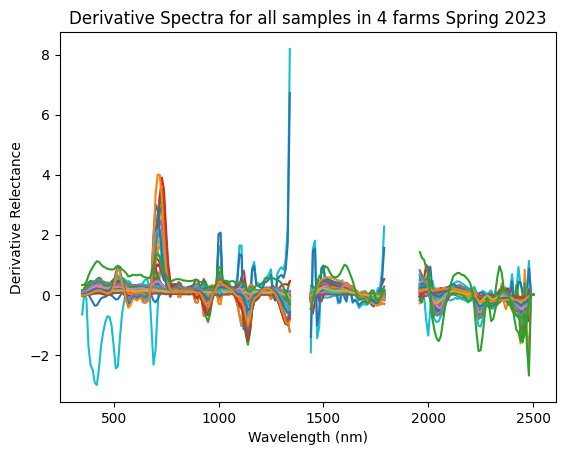

In [130]:
"""We want to plot the derivative spectra
"""
derivative_spring_2023.plot(x="Wavelength", y=['ZachA_15_Weeds_derivative',
                                        'ZachA_15_Weeds_derivative',
                                       'ZachA_15_Soil_derivative',
                                       'ZachA_14_Weeds_derivative',
                                       'ZachA_14_Soil_derivative',
                                       'ZachA_13_Weeds_derivative',
                                       'ZachA_13_Soil_derivative',
                                       'ZachA_12_Wheat_derivative ',
                                       'ZachA_12_Road_derivative',
                                       'ZachA_11_Wheat_derivative',
                                       'ZachA_11_Soil_derivative',
                                       'LynnW_05_CornRes_derivative',
                                       'LynnW_05_Soil_derivative',
                                       'LynnW_04_CornRes_derivative ' ,
                                       'LynnW_04_Soil_derivative ',
                                       'LynnW_03_CornRes_derivative ',
                                       'LynnW_03_Soil_derivative',
                                       'LynnW_02_CornRes_derivative ',
                                       'LynnW_02_Soil_derivative',
                                       'LynnW_01_CornRes_derivative ',
                                       'LynnW_01_Soil_derivative',
                                       'SK_5_Soil_derivative',
                                       'SK_5_Grass_derivative',
                                       'SK_4_Soil_derivative ',
                                       'SK_4_Grass_derivative',
                                       'SK_3_Soil_derivative' ,
                                       'SK_3_Grass_derivative',
                                       'SK_2_Soil_derivative',
                                       'SK_2_Grass_derivative',
                                       'SK_1_Soil_derivative ',
                                       'SK_1_Grass_derivative',
                                       'KB_5_Soil_derivative',
                                       'KB_5_Wheat_derivative',
                                       'KB_5_Drying_Wheat_derivative',
                                       'KB_5_Corn_Res_derivative ',
                                       'KB_4_Dry_Rye_derivative',
                                       'KB_4_Soil_derivative',
                                       'KB_3_Corn_Res_derivative ',
                                       'KB_3_Soil_derivative',
                                       'KB_1_Corn_Res_derivative',
                                       'KB_1_Soil_derivative',
                                       'JB_5_Soil_derivative',
                                       'JB_5_Corn_Res_derivative',
                                       'JB_4_Soil_derivative',
                                       'JB_4_Corn_Res_derivative',
                                       'JB_3_Soil_derivative',
                                       'JB_3_Corn_Res_derivative',
                                       'JB_2_Soil_derivative',
                                       'JB_2_Corn_Res_derivative',
                                       'JB_1_Soil_derivative',
                                       'JB_1_Corn_Res_derivative',
                                       'JB_1_Soya_Bean_derivative',
                                       'JB_0_Road_derivative',
                                       'JB_Grass_Filt_derivative',
                                       'JanD_S10_Weeds_derivative',
                                       'JanD_S9_Weeds_derivative',
                                       'JanD_S9_Corn_Res_derivative',
                                       'JanD_S8_Corn_Res_derivative',
                                       'JanD_S8_Bare_Soil_derivative',
                                       'JanD_S6_Weed_derivative',
                                       'JanD_S6_Weed_2_derivative ',
                                       'JanD_S6_Weed_3_derivative ',
                                       'JanD_S6_Corn_Rewd_derivative'



])
plt.gca().get_legend().remove()
plt.title("Derivative Spectra for all samples in 4 farms Spring 2023")
plt.ylabel("Derivative Relectance")
plt.xlabel("Wavelength (nm)")

In [131]:
''' we want to show the first 10 rows of the derivative spectra
'''
derivative_spring_2023.head(10)

,Wavelength,ZachA_15_Weeds_derivative,ZachA_15_Soil_derivative,ZachA_14_Weeds_derivative,ZachA_14_Soil_derivative,ZachA_13_Weeds_derivative,ZachA_13_Soil_derivative,ZachA_12_Wheat_derivative,ZachA_12_Road_derivative,ZachA_11_Wheat_derivative,...,JB_Grass_Filt_derivative,JanD_S10_Weeds_derivative,JanD_S9_Weeds_derivative,JanD_S9_Corn_Res_derivative,JanD_S8_Corn_Res_derivative,JanD_S8_Bare_Soil_derivative,JanD_S6_Weed_derivative,JanD_S6_Weed_2_derivative,JanD_S6_Weed_3_derivative,JanD_S6_Corn_Rewd_derivative
0,350,-0.005281,0.060978,-0.000832,0.040839,-0.011647,0.005545,-0.011322,-0.008601,-0.655343,...,0.004218,0.000599,-0.009809,0.077457,0.108654,0.029559,0.010741,0.025963,-0.012493,0.329258
1,360,0.005605,0.081897,-0.003619,0.049214,0.006625,0.027518,-0.013001,-0.009691,0.042381,...,0.003247,-0.000565,-0.009532,0.078543,0.127122,0.037857,0.021101,0.029599,-0.009615,0.329629
2,370,0.036323,0.146291,0.013253,0.105019,0.039676,0.080672,-0.004930,-0.001066,-0.123756,...,0.006300,0.012066,0.002503,0.107185,0.178711,0.058177,0.047206,0.052788,0.004685,0.438000
3,380,0.076360,0.228821,0.049443,0.187289,0.076208,0.138341,0.010323,0.020064,-1.725799,...,0.014875,0.038554,0.026391,0.167358,0.246973,0.083475,0.086076,0.090710,0.029517,0.636000
4,390,0.115458,0.267241,0.071207,0.212487,0.111778,0.165985,0.018530,0.037863,-2.344396,...,0.032060,0.058406,0.045591,0.218499,0.308960,0.099326,0.123375,0.123217,0.049883,0.800002
5,400,0.164383,0.250059,0.102408,0.197066,0.137207,0.153614,0.034832,0.074473,-2.498441,...,0.067092,0.078698,0.063795,0.247852,0.368264,0.104427,0.145688,0.154441,0.076187,0.917083
6,410,0.244600,0.260643,0.166635,0.213888,0.183130,0.160402,0.065421,0.147777,-2.930245,...,0.100975,0.103666,0.086019,0.280453,0.448514,0.116544,0.161866,0.194516,0.120418,1.031726
7,420,0.300163,0.314684,0.197567,0.265226,0.219217,0.203492,0.085760,0.169737,-3.000377,...,0.104461,0.119760,0.098693,0.305317,0.504783,0.130170,0.160079,0.212879,0.155434,1.119915
8,430,0.264296,0.349809,0.159233,0.305424,0.199436,0.231249,0.075800,0.109184,-2.444193,...,0.074961,0.115592,0.089792,0.295919,0.508072,0.136547,0.133238,0.191972,0.153241,1.094072
9,440,0.181860,0.305738,0.099917,0.273616,0.149080,0.200303,0.052444,0.044486,-1.699056,...,0.046087,0.100481,0.072596,0.268566,0.484901,0.133514,0.118788,0.178585,0.136635,1.009411


In [132]:
''' we want to add drdl to the wavelength to make it a string
'''
derivative_spring_2023['Wavelength'] = 'drdl' + derivative_spring_2023['Wavelength']. astype (str)
derivative_spring_2023.head(5)

,Wavelength,ZachA_15_Weeds_derivative,ZachA_15_Soil_derivative,ZachA_14_Weeds_derivative,ZachA_14_Soil_derivative,ZachA_13_Weeds_derivative,ZachA_13_Soil_derivative,ZachA_12_Wheat_derivative,ZachA_12_Road_derivative,ZachA_11_Wheat_derivative,...,JB_Grass_Filt_derivative,JanD_S10_Weeds_derivative,JanD_S9_Weeds_derivative,JanD_S9_Corn_Res_derivative,JanD_S8_Corn_Res_derivative,JanD_S8_Bare_Soil_derivative,JanD_S6_Weed_derivative,JanD_S6_Weed_2_derivative,JanD_S6_Weed_3_derivative,JanD_S6_Corn_Rewd_derivative
0,drdl350,-0.005281,0.060978,-0.000832,0.040839,-0.011647,0.005545,-0.011322,-0.008601,-0.655343,...,0.004218,0.000599,-0.009809,0.077457,0.108654,0.029559,0.010741,0.025963,-0.012493,0.329258
1,drdl360,0.005605,0.081897,-0.003619,0.049214,0.006625,0.027518,-0.013001,-0.009691,0.042381,...,0.003247,-0.000565,-0.009532,0.078543,0.127122,0.037857,0.021101,0.029599,-0.009615,0.329629
2,drdl370,0.036323,0.146291,0.013253,0.105019,0.039676,0.080672,-0.004930,-0.001066,-0.123756,...,0.006300,0.012066,0.002503,0.107185,0.178711,0.058177,0.047206,0.052788,0.004685,0.438000
3,drdl380,0.076360,0.228821,0.049443,0.187289,0.076208,0.138341,0.010323,0.020064,-1.725799,...,0.014875,0.038554,0.026391,0.167358,0.246973,0.083475,0.086076,0.090710,0.029517,0.636000
4,drdl390,0.115458,0.267241,0.071207,0.212487,0.111778,0.165985,0.018530,0.037863,-2.344396,...,0.032060,0.058406,0.045591,0.218499,0.308960,0.099326,0.123375,0.123217,0.049883,0.800002


In [133]:
''' we want to export our result to excel
'''
derivative_spring_2023.to_excel("Winter_2023_Derivatives.xlsx")

In [134]:
"We want to transpose the derivatives before calculating correlation matrixes"
derivative_transpose = derivative_spring_2023.set_index('Wavelength').T
derivative_transpose.head(5)

Wavelength,drdl350,drdl360,drdl370,drdl380,drdl390,drdl400,drdl410,drdl420,drdl430,drdl440,...,drdl2410,drdl2420,drdl2430,drdl2440,drdl2450,drdl2460,drdl2470,drdl2480,drdl2490,drdl2500
ZachA_15_Weeds_derivative,-0.005281,0.005605,0.036323,0.076360,0.115458,0.164383,0.244600,0.300163,0.264296,0.181860,...,-0.262395,-0.245642,-0.263843,-0.225620,-0.312717,-0.322507,0.042025,0.110931,0.0,0.0
ZachA_15_Soil_derivative,0.060978,0.081897,0.146291,0.228821,0.267241,0.250059,0.260643,0.314684,0.349809,0.305738,...,-0.363686,-0.213672,-0.220900,-0.354144,-0.386019,-0.349776,-0.342596,-0.204413,0.0,0.0
ZachA_14_Weeds_derivative,-0.000832,-0.003619,0.013253,0.049443,0.071207,0.102408,0.166635,0.197567,0.159233,0.099917,...,-0.116054,-0.138614,-0.155877,-0.122684,-0.118322,-0.131216,-0.135085,-0.066869,0.0,0.0
ZachA_14_Soil_derivative,0.040839,0.049214,0.105019,0.187289,0.212487,0.197066,0.213888,0.265226,0.305424,0.273616,...,-0.197730,-0.217173,-0.230285,-0.224334,-0.191753,-0.185074,-0.163813,-0.064058,0.0,0.0
ZachA_13_Weeds_derivative,-0.011647,0.006625,0.039676,0.076208,0.111778,0.137207,0.183130,0.219217,0.199436,0.149080,...,-0.332515,-0.308985,-0.208128,-0.117861,-0.243404,-0.460958,-0.192163,0.152064,0.0,0.0


In [135]:
derivative_transpose.shape

(62, 216)

In [136]:
''' we want to calculate the correlation matrix
'''
corr_matrix = derivative_transpose.corr(method = "pearson")
corr_matrix


Wavelength,drdl350,drdl360,drdl370,drdl380,drdl390,drdl400,drdl410,drdl420,drdl430,drdl440,...,drdl2410,drdl2420,drdl2430,drdl2440,drdl2450,drdl2460,drdl2470,drdl2480,drdl2490,drdl2500
Wavelength,,,,,,,,,,,,,,,,,,,,,
drdl350,1.000000,0.482606,0.654041,0.975384,0.972916,0.969459,0.956460,0.960268,0.974061,0.978384,...,-0.240908,-0.588634,-0.868091,-0.603000,-0.550032,0.060116,-0.383437,-0.383017,NaN,NaN
drdl360,0.482606,1.000000,0.955182,0.414024,0.354204,0.326929,0.277550,0.295224,0.378946,0.491154,...,-0.801476,-0.476166,-0.463064,-0.752623,-0.782562,-0.311966,-0.643568,-0.415383,NaN,NaN
drdl370,0.654041,0.955182,1.000000,0.631822,0.575833,0.546365,0.499914,0.515765,0.589710,0.681195,...,-0.701706,-0.452974,-0.556404,-0.777527,-0.786910,-0.152462,-0.655634,-0.510721,NaN,NaN
drdl380,0.975384,0.414024,0.631822,1.000000,0.996738,0.989312,0.978070,0.980699,0.988619,0.980967,...,-0.154865,-0.455782,-0.795784,-0.561055,-0.504360,0.187612,-0.377445,-0.443477,NaN,NaN
drdl390,0.972916,0.354204,0.575833,0.996738,1.000000,0.997074,0.990386,0.991829,0.993280,0.977770,...,-0.109846,-0.453058,-0.805610,-0.538734,-0.477485,0.202508,-0.349424,-0.425396,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drdl2460,0.060116,-0.311966,-0.152462,0.187612,0.202508,0.211029,0.233613,0.217842,0.172240,0.105906,...,0.489465,0.644646,0.163821,-0.091117,0.084804,1.000000,-0.135586,-0.558144,NaN,NaN
drdl2470,-0.383437,-0.643568,-0.655634,-0.377445,-0.349424,-0.342573,-0.320386,-0.326580,-0.366184,-0.428253,...,0.492992,0.070767,0.424720,0.832894,0.785116,-0.135586,1.000000,0.859750,NaN,NaN
drdl2480,-0.383017,-0.415383,-0.510721,-0.443477,-0.425396,-0.421786,-0.413989,-0.412389,-0.423417,-0.442914,...,0.180146,-0.242412,0.310664,0.742342,0.694688,-0.558144,0.859750,1.000000,NaN,NaN


In [137]:
''' we are checking for missing values in the correlation matrix
'''
corr_matrix.isna().sum()

Wavelength
drdl350      27
drdl360      27
drdl370      27
drdl380      27
drdl390      27
           ... 
drdl2460     27
drdl2470     27
drdl2480     27
drdl2490    216
drdl2500    216
Length: 216, dtype: int64

In [138]:
corr_matrix.shape


(216, 216)

In [139]:
"""We want to drop missing values"""
corr_matrix = corr_matrix.dropna(how = 'all')
corr_matrix


Wavelength,drdl350,drdl360,drdl370,drdl380,drdl390,drdl400,drdl410,drdl420,drdl430,drdl440,...,drdl2410,drdl2420,drdl2430,drdl2440,drdl2450,drdl2460,drdl2470,drdl2480,drdl2490,drdl2500
Wavelength,,,,,,,,,,,,,,,,,,,,,
drdl350,1.000000,0.482606,0.654041,0.975384,0.972916,0.969459,0.956460,0.960268,0.974061,0.978384,...,-0.240908,-0.588634,-0.868091,-0.603000,-0.550032,0.060116,-0.383437,-0.383017,NaN,NaN
drdl360,0.482606,1.000000,0.955182,0.414024,0.354204,0.326929,0.277550,0.295224,0.378946,0.491154,...,-0.801476,-0.476166,-0.463064,-0.752623,-0.782562,-0.311966,-0.643568,-0.415383,NaN,NaN
drdl370,0.654041,0.955182,1.000000,0.631822,0.575833,0.546365,0.499914,0.515765,0.589710,0.681195,...,-0.701706,-0.452974,-0.556404,-0.777527,-0.786910,-0.152462,-0.655634,-0.510721,NaN,NaN
drdl380,0.975384,0.414024,0.631822,1.000000,0.996738,0.989312,0.978070,0.980699,0.988619,0.980967,...,-0.154865,-0.455782,-0.795784,-0.561055,-0.504360,0.187612,-0.377445,-0.443477,NaN,NaN
drdl390,0.972916,0.354204,0.575833,0.996738,1.000000,0.997074,0.990386,0.991829,0.993280,0.977770,...,-0.109846,-0.453058,-0.805610,-0.538734,-0.477485,0.202508,-0.349424,-0.425396,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drdl2440,-0.603000,-0.752623,-0.777527,-0.561055,-0.538734,-0.542388,-0.520842,-0.529198,-0.573945,-0.643271,...,0.624582,0.352219,0.679845,1.000000,0.928359,-0.091117,0.832894,0.742342,NaN,NaN
drdl2450,-0.550032,-0.782562,-0.786910,-0.504360,-0.477485,-0.476187,-0.452206,-0.462433,-0.510003,-0.584948,...,0.656487,0.368156,0.649296,0.928359,1.000000,0.084804,0.785116,0.694688,NaN,NaN
drdl2460,0.060116,-0.311966,-0.152462,0.187612,0.202508,0.211029,0.233613,0.217842,0.172240,0.105906,...,0.489465,0.644646,0.163821,-0.091117,0.084804,1.000000,-0.135586,-0.558144,NaN,NaN


In [140]:
corr_matrix.isna().sum()

Wavelength
drdl350       0
drdl360       0
drdl370       0
drdl380       0
drdl390       0
           ... 
drdl2460      0
drdl2470      0
drdl2480      0
drdl2490    189
drdl2500    189
Length: 216, dtype: int64

In [141]:
"There are still missing values so we drop columns with missing values"
corr_matrix = corr_matrix.dropna(axis = 1)
corr_matrix

Wavelength,drdl350,drdl360,drdl370,drdl380,drdl390,drdl400,drdl410,drdl420,drdl430,drdl440,...,drdl2390,drdl2400,drdl2410,drdl2420,drdl2430,drdl2440,drdl2450,drdl2460,drdl2470,drdl2480
Wavelength,,,,,,,,,,,,,,,,,,,,,
drdl350,1.000000,0.482606,0.654041,0.975384,0.972916,0.969459,0.956460,0.960268,0.974061,0.978384,...,-0.364777,-0.683945,-0.240908,-0.588634,-0.868091,-0.603000,-0.550032,0.060116,-0.383437,-0.383017
drdl360,0.482606,1.000000,0.955182,0.414024,0.354204,0.326929,0.277550,0.295224,0.378946,0.491154,...,-0.201472,-0.259803,-0.801476,-0.476166,-0.463064,-0.752623,-0.782562,-0.311966,-0.643568,-0.415383
drdl370,0.654041,0.955182,1.000000,0.631822,0.575833,0.546365,0.499914,0.515765,0.589710,0.681195,...,-0.339643,-0.433926,-0.701706,-0.452974,-0.556404,-0.777527,-0.786910,-0.152462,-0.655634,-0.510721
drdl380,0.975384,0.414024,0.631822,1.000000,0.996738,0.989312,0.978070,0.980699,0.988619,0.980967,...,-0.445843,-0.730055,-0.154865,-0.455782,-0.795784,-0.561055,-0.504360,0.187612,-0.377445,-0.443477
drdl390,0.972916,0.354204,0.575833,0.996738,1.000000,0.997074,0.990386,0.991829,0.993280,0.977770,...,-0.434789,-0.739145,-0.109846,-0.453058,-0.805610,-0.538734,-0.477485,0.202508,-0.349424,-0.425396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drdl2440,-0.603000,-0.752623,-0.777527,-0.561055,-0.538734,-0.542388,-0.520842,-0.529198,-0.573945,-0.643271,...,0.414212,0.697594,0.624582,0.352219,0.679845,1.000000,0.928359,-0.091117,0.832894,0.742342
drdl2450,-0.550032,-0.782562,-0.786910,-0.504360,-0.477485,-0.476187,-0.452206,-0.462433,-0.510003,-0.584948,...,0.348934,0.622189,0.656487,0.368156,0.649296,0.928359,1.000000,0.084804,0.785116,0.694688
drdl2460,0.060116,-0.311966,-0.152462,0.187612,0.202508,0.211029,0.233613,0.217842,0.172240,0.105906,...,-0.438591,-0.447097,0.489465,0.644646,0.163821,-0.091117,0.084804,1.000000,-0.135586,-0.558144


In [142]:
"""Now our matrix is clean"""
corr_matrix.isna().sum()

Wavelength
drdl350     0
drdl360     0
drdl370     0
drdl380     0
drdl390     0
           ..
drdl2440    0
drdl2450    0
drdl2460    0
drdl2470    0
drdl2480    0
Length: 189, dtype: int64

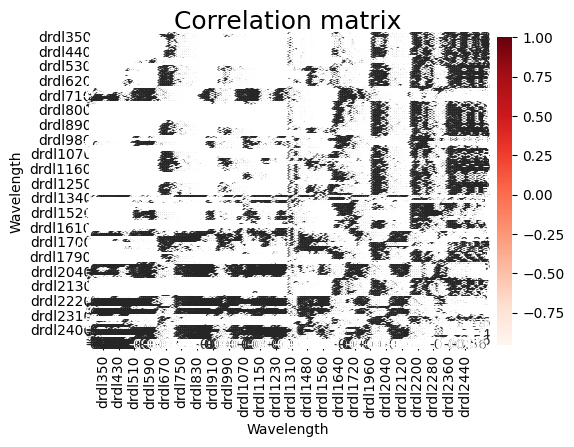

In [143]:
'''We can now plot the correlation matrix'''
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation matrix',
          fontsize=18)
plt.show()

                 PC0       PC1       PC2       PC3       PC4       PC5  \
Wavelength                                                               
drdl350    -0.078250 -0.003056 -0.097227  0.097339 -0.063386  0.084885   
drdl360    -0.083793  0.059683 -0.035474 -0.019160  0.006345  0.012118   
drdl370    -0.080346  0.056241 -0.072281  0.023834 -0.024361  0.033536   
drdl380    -0.063822 -0.000596 -0.114216  0.117247 -0.078054  0.087897   
drdl390    -0.062676 -0.008405 -0.112505  0.118873 -0.076930  0.092488   
...              ...       ...       ...       ...       ...       ...   
drdl2440    0.091632 -0.016966  0.067127 -0.011088  0.024985 -0.017268   
drdl2450    0.096030 -0.021703  0.043385 -0.001743  0.035819 -0.026184   
drdl2460    0.054156 -0.015914 -0.096899  0.083129 -0.103638  0.005357   
drdl2470    0.064960 -0.037320  0.059585 -0.002409  0.004804 -0.012168   
drdl2480    0.032471 -0.021627  0.093578 -0.048255  0.075104 -0.023875   

                 PC6       PC7       

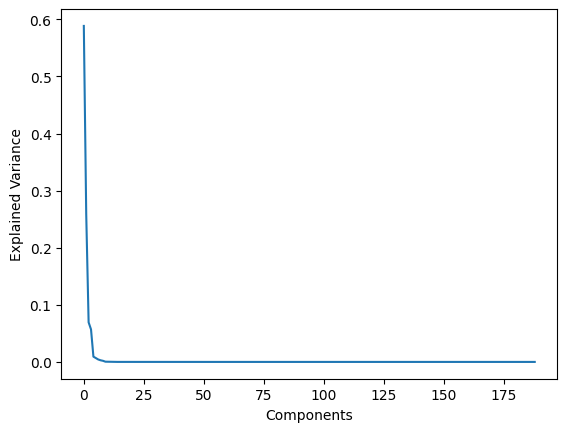

In [144]:
'''We want to calculate the PCA of the correlation matrix'''
from sklearn.decomposition import PCA


pca = PCA(n_components=corr_matrix.shape[1])
pca.fit(corr_matrix)
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(corr_matrix.columns))],
index=corr_matrix.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [145]:
"""
CODE ENDS HERE
"""

'\nCODE ENDS HERE\n'